In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

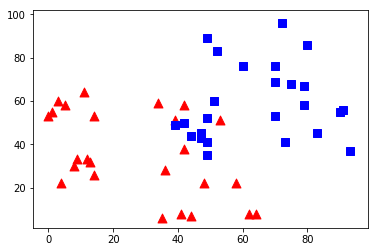

In [2]:
DataRojo = np.random.randint(0,65,(25,2)).astype(np.float32)
DataAzul = np.random.randint(35,100,(25,2)).astype(np.float32)
clasificaciones = np.concatenate([-np.ones(25),np.ones(25)]).astype(np.int32)# concatinate concatena 2 arreglos, puedes
#poner un segundo argumento para poner en que dimension quieres concatenar, si no se pone nada los arreglos se aplastan
#a vectores antes de concatenar
Data=np.concatenate([DataRojo,DataAzul])

plt.scatter(DataRojo[:,0],DataRojo[:,1],80,'r','^')
plt.scatter(DataAzul[:,0],DataAzul[:,1],80,'b','s')

plt.show()

In [9]:
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
svm = cv2.ml.SVM_create()#creamos nuestro objeto SVM
svm.setType(cv2.ml.SVM_C_SVC) #Le asignamos que tipo de SVM usaremos SVM_C_SVC es por mucho la mas comun
svm.setKernel(cv2.ml.SVM_SIGMOID)#Le decimos que kernel queremos usar, SVM_LINEAR no hace tranformada
#svm.setKernel(cv2.ml.SVM_LINEAR)#Le decimos que kernel queremos usar, SVM_LINEAR no hace tranformada
svm.train(Data,cv2.ml.ROW_SAMPLE,clasificaciones)#introducimos los datos,la manera en que estan acomodados,
          #y que clasificacion son

True

In [10]:
imagen.shape

(100, 100, 3)

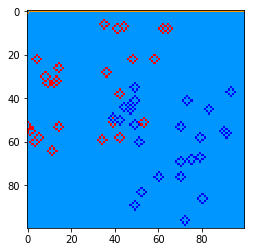

In [11]:
height=100
width=100
imagen=np.zeros((height,width,3),dtype=np.uint8)#aqui estamos creando una matriz que usaremos para forma una imagen
#de color, por eso tiene 3 en su ultima dimension representa Rojo,Verde,Azul

rojo=(255,150,0)
azul=(0,150,255)

for i in range(imagen.shape[0]):
    for j in range(imagen.shape[1]): #con este for dentro de for estamos probando cada pixel dentro de la imagen 
        #que creamos
        sampleMat = np.matrix([[j,i]], dtype=np.float32)#para hacer prediciones hay que convertir nuestro arreglo en una
        #matrix
        response = svm.predict(sampleMat)[1]#hacemos predicion sobre el punto que queremos y nos dice de que clase es
        if response == 1:
            imagen[i,j] = azul
        elif response == -1:
            imagen[i,j] = rojo
            
for i in range(len(DataRojo)):
    cv2.circle(imagen,(DataRojo[i,0],DataRojo[i,1]),2,(250,0,0))#dibuja un circulo sobre la imagen dada, en las coordenadas
    #dadas , de tamaño dado y de color dado
    
for i in range(len(DataAzul)):
    cv2.circle(imagen,(DataAzul[i,0],DataAzul[i,1]),2,(0,0,250))
plt.imshow(imagen)  